In [1]:
import rebound # import the rebound module
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
%matplotlib inline
GOLDEN_RATIO = 0.5*(1. + np.sqrt(5))

In [2]:
sim = rebound.Simulation() # create a 'simulation' object

# add particles to rebound
# download from JPL Horizons
# 399 = Earth
# 301 = Moon
sim.add(["Sun", "Mercury", "Venus", "399", "301", "Mars", "Jupiter", "Saturn", "Uranus", "Neptune"])
sim.add("Apophis")

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for '399'... Found: Earth (399).
Searching NASA Horizons for '301'... Found: Moon (301).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).
Searching NASA Horizons for 'Apophis'... Found: 99942 Apophis (2004 MN4).


/home/ridlo/anaconda2/lib/python2.7/site-packages/rebound/horizons.py:127: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [3]:
# ofile = 'init.txt'
# text = sim.particles_ascii()
# with open(ofile, 'w') as of:
#     of.write(text)

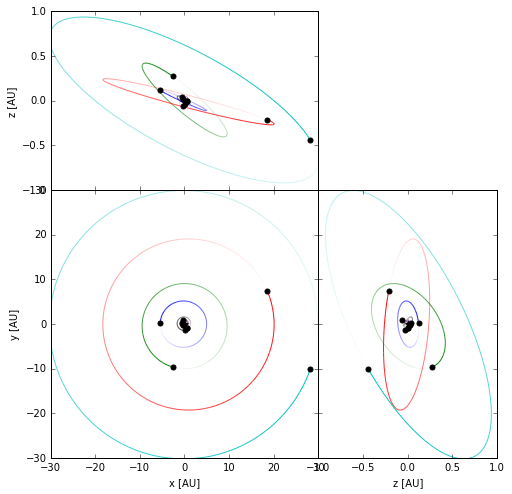

In [4]:
# plot initial orbit before integration
fig = rebound.OrbitPlot(sim, slices=True, trails=True, color=True, unitlabel="[AU]", lim=30, limz=1)
plt.savefig("initial.png")

In [5]:
print sim.particles[0]

<rebound.Particle object, m=1.0 x=0.00369387810005 y=0.00286539545578 z=-0.000162218038277 vx=-7.20885035781e-05 vy=0.000407329402321 vz=1.14801696166e-06>


In [6]:
Noutputs = 100000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,100.*year, Noutputs)
x = np.zeros((3,Noutputs)) # the Earth, Moon, and Apophis
y = np.zeros((3,Noutputs))
z = np.zeros((3,Noutputs))

vx = np.zeros((3,Noutputs))
vy = np.zeros((3,Noutputs))
vz = np.zeros((3,Noutputs))

a = np.zeros((3,Noutputs))
e = np.zeros((3,Noutputs))
inc = np.zeros((3,Noutputs))



sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.dt = 0.001           # unit?
sim.move_to_com()        # We always move to the center of momentum frame before an integration

ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i, time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[3].x
    y[0][i] = ps[3].y
    z[0][i] = ps[3].z
    vx[0][i] = ps[3].vx
    vy[0][i] = ps[3].vy
    vz[0][i] = ps[3].vz
    a[0][i] = ps[3].a
    e[0][i] = ps[3].e
    inc[0][i] = ps[3].inc
    
    x[1][i] = ps[4].x
    y[1][i] = ps[4].y
    z[1][i] = ps[4].z
    vx[1][i] = ps[4].vx
    vy[1][i] = ps[4].vy
    vz[1][i] = ps[4].vz
    a[1][i] = ps[4].a # calculated relative to the Sun (NOT Earth)
    e[1][i] = ps[4].e
    inc[1][i] = ps[4].inc

    x[2][i] = ps[10].x
    y[2][i] = ps[10].y
    z[2][i] = ps[10].z
    vx[2][i] = ps[10].vx
    vy[2][i] = ps[10].vy
    vz[2][i] = ps[10].vz
    a[2][i] = ps[10].a
    e[2][i] = ps[10].e
    inc[2][i] = ps[10].inc

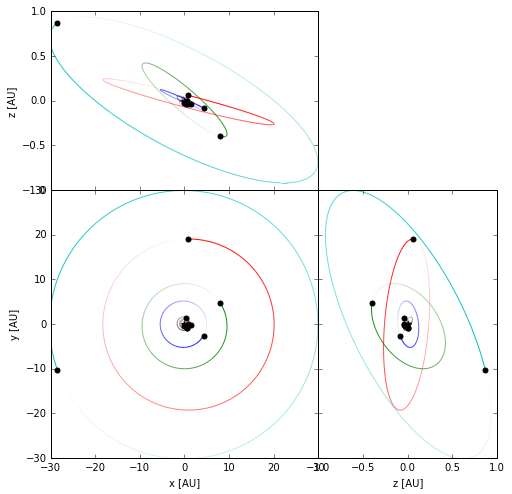

In [7]:
fig = rebound.OrbitPlot(sim, slices=True, trails=True, color=True, unitlabel="[AU]", lim=30, limz=1)
plt.savefig("after_100yrs.png")

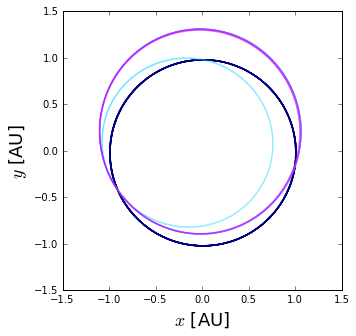

In [8]:
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])

t = times/year
color = t/255.

plt.scatter(x[0], y[0], c='b', s=0.1, lw=0, alpha=0.5)
plt.scatter(x[2], y[2], c=color, s=0.1, lw=0, alpha=0.5, cmap='cool')
plt.xlabel(r'$x$ [AU]', fontsize=18)
plt.ylabel(r'$y$ [AU]', fontsize=18)
plt.savefig('100yrs_xy.png')

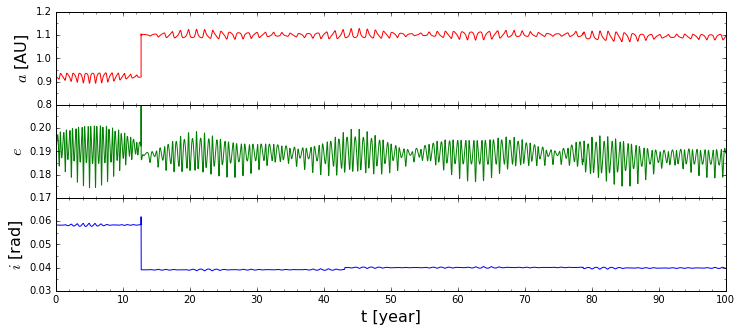

In [9]:
aei = np.array([a[2], e[2], inc[2]])

nRow = 3
xSize = 12
ySize = float(nRow)*xSize/GOLDEN_RATIO
color = ['r', 'g', 'b']

ymin = [0.8, 0.17, 0.030]
ymax = [1.2, 0.21, 0.070]
startY = [0.0, 0.0, 0.0]
delY = [0.1, 0.01, 0.01]
delMY = [0.05, 0.005, 0.005]

xmin = 0.0
xmax = 100.0
startX = xmin
delX = 10.0
delMX = 2.0
ylabel = [r'$a$ [AU]', r'$e$', r'$i$ [rad]']

fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(nRow, 1, wspace=0, hspace=0)
xticks = np.arange(startX, xmax+1.e-3*delX, delX)
for i in range(nRow):
    ax = plt.subplot(gs[i])
    ax.plot(times/year, aei[i], color[i])
    
    ax.set_xticks(xticks)
    ax.set_xlim(xmin, xmax)
    minorLocator_x = MultipleLocator(delMX)
    ax.xaxis.set_minor_locator(minorLocator_x)
   
    if i == 0:
        yticks = np.arange(startY[i], ymax[i]+1.e-3*delY[i], delY[i])
        ax.set_yticks(yticks)
    else:
        yticks = np.arange(startY[i], ymax[i]-1.e-3*delY[i], delY[i])
        ax.set_yticks(yticks)
    minorLocator_y = MultipleLocator(delMY[i])
    ax.yaxis.set_minor_locator(minorLocator_y)
    ax.set_ylim(ymin[i], ymax[i])
    
    if (i<(nRow-1)):
        ax.set_xticklabels('')
    if (i==(nRow-1)):
        ax.set_xlabel('t [year]', fontsize=16)
    ax.set_ylabel(ylabel[i], fontsize=16)

plt.savefig("aei.png", bbox_inches='tight', dpi=300)

Minimum distance (0.000285 AU) occured at time: 12.710127 years.


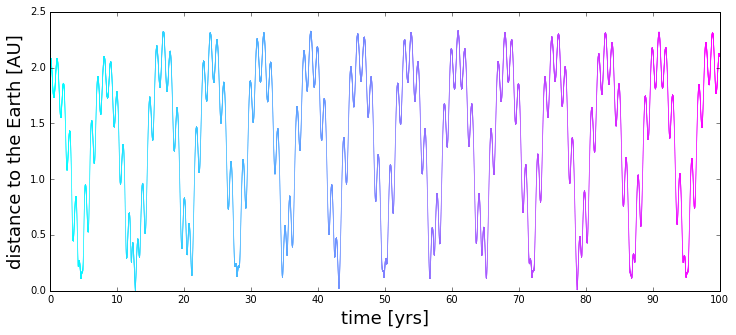

In [10]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)

distance = np.sqrt(np.square(x[0]-x[2])+np.square(y[0]-y[2])+np.square(z[0]-z[2]))

color = t/255.
ax.scatter(t, distance, c=color, s=0.5, lw=0, cmap='cool')
ax.set_xlabel("time [yrs]", fontsize=18)
ax.set_ylabel("distance to the Earth [AU]", fontsize=18)
xticks = np.arange(0, xmax+1.e-3*10, 10)
ax.set_xticks(xticks)
ax.set_xlim(xmin, xmax)
ax.set_ylim(0.0, 2.5)

closeencountertime = times[np.argmin(distance)]/year
print("Minimum distance (%f AU) occured at time: %f years." % (np.min(distance), closeencountertime))